# **Data loading**

In [51]:
import pandas as pd
import seaborn as sns  # matplotlib plotting nice with shortcuts
import matplotlib.pyplot as plt  # For plotting
import requests

plt.rcParams["font.family"] = "DejaVu Sans" # font

In [52]:
import os

# Specify the directory
directory = 'sample_data'

# List all files in the directory
files = os.listdir(directory)

# Print the files
for file in files:
    print(file)

anscombe.json
README.md
.ipynb_checkpoints
EyeTracking_FeaturesExtracted.csv
mnist_train_small.csv
mnist_test.csv
california_housing_test.csv
california_housing_train.csv


**Explanatory analysis**

In [53]:
# Set pandas option to display all columns
pd.set_option('display.max_columns', None)


# Specify the path to your CSV file
file_path = 'sample_data/EyeTracking_FeaturesExtracted.csv'

try:
    df = pd.read_csv(file_path)

    # Remove unwanted columns ("X" and "Unnamed: 0")
    df = df.loc[:, ~df.columns.isin(["X", "Unnamed: 0"])]

    display(df.head(315))  # Display the first few rows of the DataFrame
except FileNotFoundError:
    print(f"Error: '{file_path}' not found. Please ensure the file exists and the path is correct.")
except pd.errors.EmptyDataError:
    print(f"Error: '{file_path}' is empty.")
except pd.errors.ParserError:
    print(f"Error: Unable to parse '{file_path}'. Please check the file format.")
except Exception as e:
    print(f"An unexpected error occurred: {e}")

,Subject_ID,Quad_Cat,Num_of_Fixations,Mean_Fixation_Duration,SD_Fixation_Duration,Skew_Fixation_Duration,Max_Fixation_Duration,First_Fixation_Duration,Num_of_Saccade,Mean_Saccade_Duration,SD_Saccade_Duration,Skew_Saccade_Duration,Max_Saccade_Duration,Mean_Saccade_Amplitude,SD_Saccade_Amplitude,Skew_Saccade_Amplitude,Max_Saccade_Amplitude,Mean_Saccade_Direction,SD_Saccade_Direction,Skew_Saccade_Direction,Max_Saccade_Direction,Mean_Saccade_Length,SD_Saccade_Length,Skew_Saccade_Length,Max_Saccade_Length,Num_of_Blink,Mean_Blink_Duration,SD_Blink_Duration,Skew_Blink_Duration,Max_Blink_Duration,Num_of_Microsac,Mean_Microsac_Peak_Vel,SD_Microsac_Peak_Vel,Skew_Microsac_Peak_Vel,Max_Microsac_Peak_Vel,Mean_Microsac_Ampl,SD_Microsac_Ampl,Skew_Microsac_Ampl,Max_Microsac_Ampl,Mean_Microsac_Dir,SD_Microsac_Dir,Skew_Microsac_Dir,Max_Microsac_Dir,Mean_Microsac_H_Amp,SD_Microsac_H_Amp,Skew_Microsac_H_Amp,Max_Microsac_H_Amp,Mean_Microsac_V_Amp,SD_Microsac_V_Amp,Skew_Microsac_V_Amp,Max_Microsac_V_Amp
0,1,1,0.605556,1208.440367,1013.049251,2.080900,6127,1640,0.605556,438.064220,517.053212,2.016306,2735,28.084787,35.635492,3.158916,250.561901,-0.361115,1.934984,0.156750,3.139621,28.087639,35.639110,3.158916,250.587340,0.177778,77.468750,32.272014,2.743090,219.0,0.966667,163.868694,67.489295,0.302996,348.630755,15.457273,21.834590,5.556834,220.107625,6.280908,114.894665,-0.047816,179.719495,0.419874,25.214209,3.156580,220.069746,-0.182289,8.975206,0.107803,45.070474
1,1,0,0.459184,1796.311111,1880.259542,2.346293,9773,556,0.448980,392.000000,426.838023,1.023167,1430,26.092102,30.126696,2.101447,150.589219,-0.181994,2.038649,-0.010814,3.113317,26.094752,30.129755,2.101447,150.604508,0.061224,104.500000,89.992777,1.322178,287.0,1.153061,143.316068,71.799603,0.998450,385.032004,21.851755,72.383461,9.113774,751.318235,16.061188,114.100304,-0.161061,179.563907,-4.596920,74.737290,-8.745373,144.173940,0.660248,10.523471,3.971437,81.150671
2,1,0,0.480000,1617.694444,1895.391401,1.633123,7573,671,0.466667,481.314286,528.473650,1.719941,2443,25.584649,29.191183,2.159989,140.845506,0.222246,2.055253,-0.087640,3.137428,25.587247,29.194147,2.159989,140.859806,0.080000,67.500000,14.010710,0.682107,92.0,0.973333,134.204266,72.693242,0.933668,353.824560,12.566510,18.959275,5.347712,149.207161,23.256736,112.532198,-0.214484,179.789091,-1.217540,17.351371,-2.922202,35.323715,-1.158868,14.659309,-5.198588,26.595861
3,1,3,0.454545,1858.763636,2711.244828,3.296111,14840,1804,0.446281,349.240741,427.406260,2.130970,2172,21.121977,29.634633,2.266864,144.931400,0.316127,2.125495,-0.216270,3.138398,21.124121,29.637642,2.266864,144.946115,0.033058,59.500000,8.888194,0.469973,72.0,1.719008,113.086733,78.881306,1.696871,494.004621,11.294656,23.302504,5.483168,212.842317,-15.545367,117.013190,0.083588,179.846777,-0.908321,25.611097,-3.302714,122.294054,0.094660,3.775847,1.529565,29.637883
4,1,1,0.527778,1582.126316,1520.578818,1.862892,7526,1315,0.522222,311.531915,355.951480,2.211397,2000,20.600883,24.086827,2.417802,132.156254,-0.252053,2.005192,0.054300,3.140576,20.602975,24.089273,2.417802,132.169672,0.127778,89.217391,45.167322,1.657277,213.0,0.894444,141.092563,52.821705,0.809577,344.099709,10.787304,14.371270,4.674886,123.173448,-28.169829,120.587891,0.219166,179.868585,-2.472084,17.046195,-2.911459,55.629425,-0.538492,5.075856,-2.305319,17.997401
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307,26,2,0.448276,2023.403846,2121.443120,2.327756,11573,7313,0.439655,222.294118,302.584487,1.978702,1283,16.709409,18.634298,1.838811,75.064098,-0.155017,2.380389,0.044704,3.139598,16.711105,18.636190,1.838811,75.071719,0.051724,79.000000,9.528903,0.010402,89.0,1.965517,100.225630,54.632888,0.985426,301.360415,7.560089,11.090907,4.289210,91.292344,-4.178897,115.043226,0.024436,179.918096,-0.191682,13.274505,0.466416,91.

In [4]:
#print(df.head(1000))

In [54]:
# 1. Look at the two columns:
myDF = df[['Num_of_Blink', 'Mean_Fixation_Duration']]
display(myDF.head(10))
display(myDF.info())

,Num_of_Blink,Mean_Fixation_Duration
0,0.177778,1208.440367
1,0.061224,1796.311111
2,0.080000,1617.694444
3,0.033058,1858.763636
4,0.127778,1582.126316
5,0.220930,2284.343284
6,0.051724,1314.734694
7,0.250000,2975.729730
8,0.059603,2744.520833
9,0.093168,1604.475000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 312 entries, 0 to 311
Data columns (total 2 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Num_of_Blink            312 non-null    float64
 1   Mean_Fixation_Duration  312 non-null    float64
dtypes: float64(2)
memory usage: 5.0 KB


None


**Data Preparation:**
 We load necessary libraries for mixed modeling, visualization, and evaluation. Then we read the CSV data and convert categorical variables to factors. Finally, we perform initial data quality checks and standarization of the fixed effects.


In [11]:
# Handle R working space, install the require libraries and load them
# Load the R magic extension
%load_ext rpy2.ipython

In [56]:
%%R
# Install required libraries if not already installed
if (!requireNamespace("lme4", quietly = TRUE)) {
    install.packages("lme4")
}
if (!requireNamespace("lmerTest", quietly = TRUE)) {
    install.packages("lmerTest")
}
if (!requireNamespace("emmeans", quietly = TRUE)) {
    install.packages("emmeans")
}
if (!requireNamespace("car", quietly = TRUE)) {
    install.packages("car")
}
if (!requireNamespace("ggplot2", quietly = TRUE)) {
    install.packages("ggplot2")
}
if (!requireNamespace("dplyr", quietly = TRUE)) {
    install.packages("dplyr")
}
if (!requireNamespace("sjPlot", quietly = TRUE)) {
    install.packages("sjPlot")
}
if (!requireNamespace("caret", quietly = TRUE)) {
    install.packages("caret")
}

# Load required libraries
library(lme4)      # For linear mixed models
library(lmerTest)  # Provides p-values in lme4
library(emmeans)   # For post-hoc tests
library(car)       # For Anova function
library(ggplot2)   # For visualization
library(dplyr)     # For data manipulation
library(sjPlot)    # For model visualization
library(caret)     # For model evaluation
invisible()

In [13]:
%%R
# Load the data (adjust path as needed)
data <- read.csv("EyeTracking_FeaturesExtracted.csv")

# Data preparation
# Convert Subject_ID and Quad_Cat to factors
data$Subject_ID <- as.factor(data$Subject_ID)
data$Quad_Cat <- as.factor(data$Quad_Cat)

# Check the structure of the data
str(data)
summary(data)

# Check for missing values
missing_values <- colSums(is.na(data))
print(missing_values[missing_values > 0])

# standardize predictors for better model convergence
data$Num_of_Blink_z <- scale(data$Num_of_Blink)
### data$Mean_Saccade_Length_z <- scale(data$Mean_Saccade_Length)
data$Mean_Fixation_Duration_z <- scale(data$Mean_Fixation_Duration)


'data.frame':	312 obs. of  51 variables:
 $ Subject_ID             : Factor w/ 26 levels "1","2","3","4",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ Quad_Cat               : Factor w/ 4 levels "0","1","2","3": 2 1 1 4 2 3 3 3 1 2 ...
 $ Num_of_Fixations       : num  0.606 0.459 0.48 0.455 0.528 ...
 $ Mean_Fixation_Duration : num  1208 1796 1618 1859 1582 ...
 $ SD_Fixation_Duration   : num  1013 1880 1895 2711 1521 ...
 $ Skew_Fixation_Duration : num  2.08 2.35 1.63 3.3 1.86 ...
 $ Max_Fixation_Duration  : int  6127 9773 7573 14840 7526 14316 9735 9199 15370 7087 ...
 $ First_Fixation_Duration: int  1640 556 671 1804 1315 1906 1473 3182 9602 1278 ...
 $ Num_of_Saccade         : num  0.606 0.449 0.467 0.446 0.522 ...
 $ Mean_Saccade_Duration  : num  438 392 481 349 312 ...
 $ SD_Saccade_Duration    : num  517 427 528 427 356 ...
 $ Skew_Saccade_Duration  : num  2.02 1.02 1.72 2.13 2.21 ...
 $ Max_Saccade_Duration   : int  2735 1430 2443 2172 2000 1310 2587 1972 1502 2071 ...
 $ Mean_Saccade_Amplitu

# **Model Structure**

Creates four different models relating to our hypothesis:

Model 1: Using fixed effect 1: Number of Blinks

Model 2: Using fixed effect 2: Mean Fixation Duration

Model 3: Using both fixed effects

Model 4: Interaction between the fixed effects


---


The only random effect used is Subject_ID to account for individual differences.

In [57]:
%%R
# Install and Load Necessary Packages
if (!requireNamespace("brms", quietly = TRUE)) {
    install.packages("brms")
}
if (!requireNamespace("dplyr", quietly = TRUE)) {
    install.packages("dplyr")
}

library(brms)
library(dplyr)
invisible()

In [ ]:
%%R
# Fit Multinomial Logistic Mixed Models with brms

# Model 1: Using Num_of_Blink as a fixed effect
model1 <- brm(Quad_Cat ~ Num_of_Blink_z + (1|Subject_ID),
              data = data,
              family = categorical(),
              chains = 2,
              cores = 2,
              iter = 2000,
              control = list(adapt_delta = 0.95))

# Model 2: Using Mean_Fixation_Duration as a fixed effect
model2 <- brm(Quad_Cat ~ Mean_Fixation_Duration_z + (1|Subject_ID),
              data = data,
              family = categorical(),
              chains = 2,
              cores = 2,
              iter = 2000,
              control = list(adapt_delta = 0.95))

# Model 3: Both indicators as fixed effects
model3 <- brm(Quad_Cat ~ Num_of_Blink_z + Mean_Fixation_Duration_z + (1|Subject_ID),
              data = data,
              family = categorical(),
              chains = 2,
              cores = 2,
              iter = 2000,
              control = list(adapt_delta = 0.95))

# Model 4: Interaction between indicators
model4 <- brm(Quad_Cat ~ Num_of_Blink_z * Mean_Fixation_Duration_z + (1|Subject_ID),
              data = data,
              family = categorical(),
              chains = 2,
              cores = 2,
              iter = 2000,
              control = list(adapt_delta = 0.95))

# **Summary of the 4 models**

**Bayesian multinomial logistic mixed models** summaries analyzing the influence of standardized predictors (Num_of_Blink_z, Mean_Fixation_Duration_z) on the categorical outcome Quad_Cat, with random intercepts for Subject_ID.

Model 1 highlights a significant positive association between Num_of_Blink_z and category probabilities.

Variability across subjects is captured by random intercepts.

All models show good MCMC convergence (Rhat ≈ 1.00) and adequate effective sample sizes, confirming reliable parameter estimation and model fit.




In [22]:
%%R
# Print Summary of Models
print(summary(model1))
print(summary(model2))
print(summary(model3))
print(summary(model4))

 Family: categorical 
  Links: mu1 = logit; mu2 = logit; mu3 = logit 
Formula: Quad_Cat ~ Num_of_Blink_z + (1 | Subject_ID) 
   Data: data (Number of observations: 312) 
  Draws: 2 chains, each with iter = 2000; warmup = 1000; thin = 1;
         total post-warmup draws = 2000

Multilevel Hyperparameters:
~Subject_ID (Number of levels: 26) 
                  Estimate Est.Error l-95% CI u-95% CI Rhat Bulk_ESS Tail_ESS
sd(mu1_Intercept)     0.11      0.09     0.00     0.34 1.00     1846      785
sd(mu2_Intercept)     0.12      0.09     0.00     0.35 1.00     1457      934
sd(mu3_Intercept)     0.13      0.10     0.01     0.36 1.00     1392      989

Regression Coefficients:
                   Estimate Est.Error l-95% CI u-95% CI Rhat Bulk_ESS Tail_ESS
mu1_Intercept          0.05      0.17    -0.29     0.37 1.00     1300     1298
mu2_Intercept          0.04      0.17    -0.30     0.38 1.00     1361     1375
mu3_Intercept          0.02      0.17    -0.32     0.34 1.00     1337     1403
mu1_

# **Models Comparison using LOOIC**

**LOOIC:** A lower LOOIC value indicates better predictive accuracy and suggests the model is likely to perform well on new data.

In [25]:
%%R

# ----- Model Comparison -----

# Compare models using LOO (Leave-One-Out Cross-Validation)
loo1 <- loo(model1)
loo2 <- loo(model2)
loo3 <- loo(model3)
loo4 <- loo(model4)

# Create a data frame for LOO comparison
loo_compare_df <- data.frame(
  Model = c("Model 1: Num_of_Blink",
            "Model 2: Mean_Fixation_Duration",
            "Model 3: Both predictors",
            "Model 4: Interaction"),
  LOOIC = c(loo1$estimates['looic', 'Estimate'],
            loo2$estimates['looic', 'Estimate'],
            loo3$estimates['looic', 'Estimate'],
            loo4$estimates['looic', 'Estimate'])
)

print(loo_compare_df)

# Perform comparison
loo_comparison <- loo_compare(loo1, loo2, loo3, loo4)
print(loo_comparison)

# Select the best model based on LOOIC
# Lower LOOIC values indicate a better fit
best_model <- model1  # Adjust based on actual comparison results

                            Model    LOOIC
1           Model 1: Num_of_Blink 873.9977
2 Model 2: Mean_Fixation_Duration 888.5319
3        Model 3: Both predictors 880.6028
4            Model 4: Interaction 875.7951
       elpd_diff se_diff
model1  0.0       0.0   
model4 -0.9       4.4   
model3 -3.3       3.5   
model2 -7.3       5.0   


In addition: Warning messages:
1: Found 1 observations with a pareto_k > 0.7 in model 'model2'. We recommend to set 'moment_match = TRUE' in order to perform moment matching for problematic observations.  
2: Found 1 observations with a pareto_k > 0.7 in model 'model3'. We recommend to set 'moment_match = TRUE' in order to perform moment matching for problematic observations.  
3: Found 3 observations with a pareto_k > 0.7 in model 'model4'. We recommend to set 'moment_match = TRUE' in order to perform moment matching for problematic observations.  


Comparison Among Models:

- Model 1: Num_of_Blink: 873.9977
- Model 4: Interaction: 875.7951
- Model 3: Both predictors: 880.6028
- Model 2: Mean_Fixation_Duration: 888.5319

In this case, Model 1 has the lowest LOOIC, suggesting it has the best out-of-sample predictive performance among the models assessed.


Hit <Return> to see next plot: 


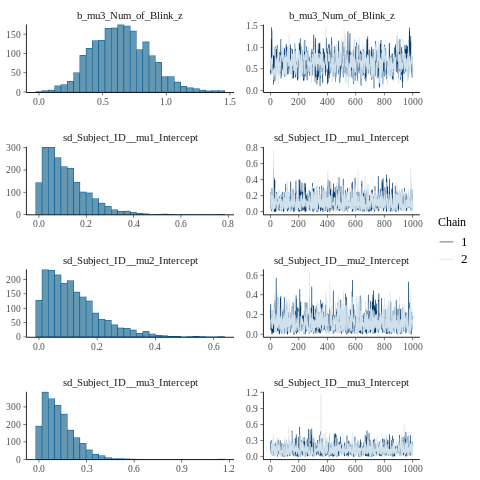

In [24]:
%%R
# Plot Diagnostics for Model 1 (updates can be made for other models)
plot(model1)

# **Model Performance**:

Plots data points with actual vs. predicted quadrants




Using 10 posterior draws for ppc type 'dens_overlay' by default.


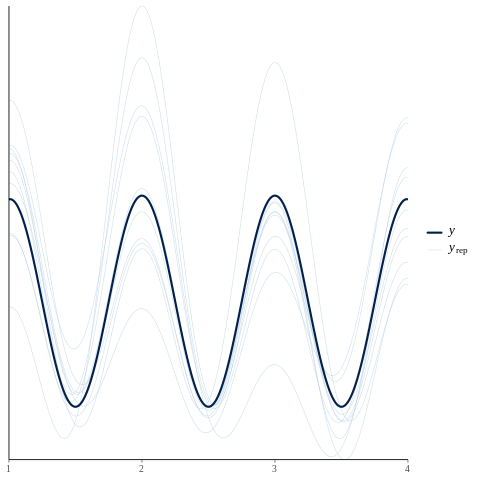

In [29]:
%%R
# Posterior Predictive Checks
pp_check(best_model)

NULL


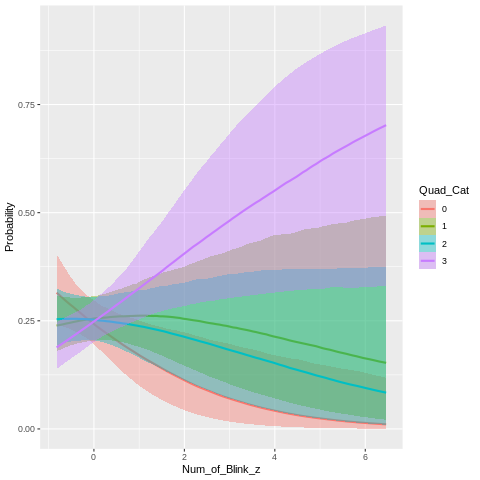

In [48]:
%%R
# Plot conditional effects for multiple variables
effects <- conditional_effects(
  best_model,
  effects = "Num_of_Blink_z",
  categorical = TRUE
)


# Print effects to check content
print(effects)

# Plot the single effect
plot_single <- plot(effects, plot = TRUE) +
  ggplot2::theme_minimal()

# Display the plot
print(plot_single)

NULL


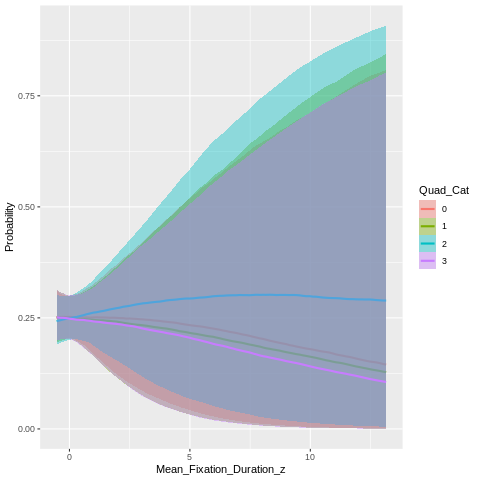

In [50]:
%%R
# Plot conditional effects for multiple variables
effects <- conditional_effects(
  model2,
  effects = "Mean_Fixation_Duration_z",
  categorical = TRUE
)


# Print effects to check content
print(effects)

# Plot the single effect
plot_single <- plot(effects, plot = TRUE) +
  ggplot2::theme_minimal()

# Display the plot
print(plot_single)

Hit <Return> to see next plot: 


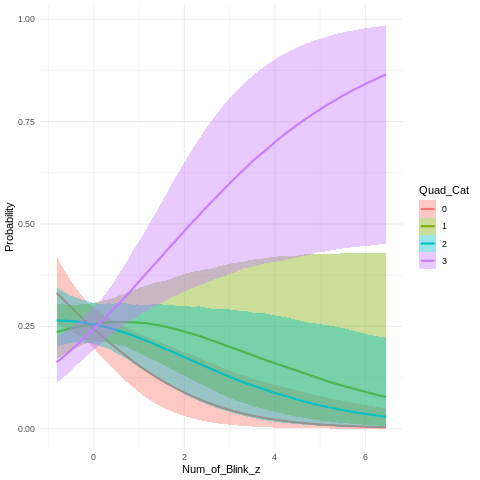

In [40]:
%%R
# Plot conditional effects for multiple variables
effects <- conditional_effects(
  model3,
  effects = c("Num_of_Blink_z", "Mean_Fixation_Duration_z"),
  categorical = TRUE
)


# Print effects to check content
print(effects)

# Plot only one effect to find issue
plot_single <- plot(effects, plot = FALSE)[[1]]
print(plot_single)

# Debugging: Ensure no NA values influence limits
if (any(is.infinite(unlist(plot_single$data)))) {
  print("Data contains infinite or missing values.")
}

# Adjust plotting to handle single cases
if (!is.null(plot_single)) {
  print(plot_single + ggplot2::theme_minimal())
}

Hit <Return> to see next plot: 2


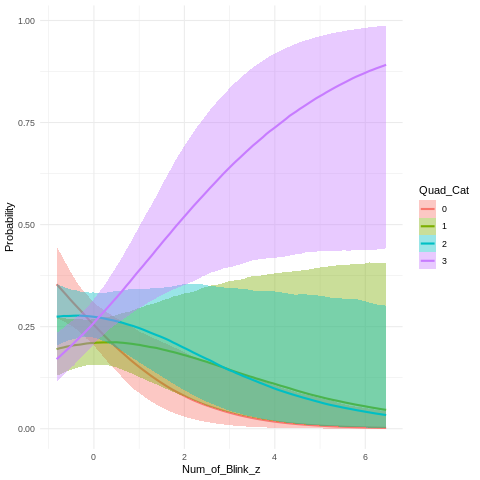

In [39]:
%%R
# Plot conditional effects for multiple variables
effects <- conditional_effects(
  model4,
  effects = c("Num_of_Blink_z", "Mean_Fixation_Duration_z"),
  categorical = TRUE
)


# Print effects to check content
print(effects)

# Plot only one effect to find issue
plot_single <- plot(effects, plot = FALSE)[[1]]
print(plot_single)

# Debugging: Ensure no NA values influence limits
if (any(is.infinite(unlist(plot_single$data)))) {
  print("Data contains infinite or missing values.")
}

# Adjust plotting to handle single cases
if (!is.null(plot_single)) {
  print(plot_single + ggplot2::theme_minimal())
}